# Homework 1: Wasil Engel 

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import bokeh
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from ipywidgets import interact, interact_manual
import statsmodels.formula.api as smf
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression 

In [2]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [3]:
# 3 Preparing the Data

In [4]:
# 1

In [5]:
path_1 = '/Users/wasilengel/Desktop/School/Harris/Machine Learning/PUMS/usa_00001.csv'

In [6]:
path_2 = '/Users/wasilengel/Desktop/School/Harris/Machine Learning/PUMS/PPHA_30545_MP01-Crosswalk.csv'

In [7]:
df = pd.read_csv(path_1)

In [8]:
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,RACED,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD
0,2019,201901,1176,2019010075542,1238.4,2019000011761,180001,4,1,1238.4,...,100,1,100,5,50,1,10,20000,1,11
1,2019,201901,1486,2019010094132,774.0,2019000014861,130101,4,1,774.0,...,200,0,0,7,71,1,10,25000,1,11
2,2019,201901,2415,2019000001850,6192.0,2019000024151,270301,1,1,6346.8,...,100,0,0,3,30,1,10,48000,1,11
3,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,1,11610.0,...,100,0,0,6,63,1,10,3500,1,11
4,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,2,15944.4,...,200,0,0,6,63,1,10,60000,1,11


In [9]:
crosswalk = pd.read_csv(path_2)

In [10]:
crosswalk

,educd,educdc
0,2,0.0
1,10,0.0
2,11,2.0
3,12,0.0
4,13,2.5
5,14,1.0
6,15,2.0
7,16,3.0
8,17,4.0
9,20,6.5


In [11]:
# 2a

In [12]:
# vector = np.array(crosswalk["educdc"])
# vector

In [13]:
crosswalk_dict = dict(zip(crosswalk.educd, crosswalk.educdc))
crosswalk_dict

{2: 0.0,
 10: 0.0,
 11: 2.0,
 12: 0.0,
 13: 2.5,
 14: 1.0,
 15: 2.0,
 16: 3.0,
 17: 4.0,
 20: 6.5,
 21: 5.5,
 22: 5.0,
 23: 6.0,
 24: 7.5,
 25: 7.0,
 26: 8.0,
 30: 9.0,
 40: 10.0,
 50: 11.0,
 61: 12.0,
 62: 12.0,
 63: 12.0,
 64: 12.0,
 65: 13.0,
 70: 13.0,
 71: 14.0,
 80: 14.0,
 81: 14.0,
 82: 14.0,
 83: 14.0,
 90: 15.0,
 100: 16.0,
 101: 16.0,
 110: 17.0,
 111: 18.0,
 112: 19.0,
 113: 20.0,
 114: 18.0,
 115: 18.0,
 116: 22.0}

In [14]:
df["EDUCD"].unique()

array([ 50,  71,  30,  63,  65, 114,  64,  61,  81,   2, 101, 115, 116,
        26,  23,  40,  11,  22,  25,  16,  17,  15,  14])

In [15]:
df["educdc"] = df["EDUCD"]
df["educdc"].replace(crosswalk_dict, inplace = True)
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD,educdc
0,2019,201901,1176,2019010075542,1238.4,2019000011761,180001,4,1,1238.4,...,1,100,5,50,1,10,20000,1,11,11.0
1,2019,201901,1486,2019010094132,774.0,2019000014861,130101,4,1,774.0,...,0,0,7,71,1,10,25000,1,11,14.0
2,2019,201901,2415,2019000001850,6192.0,2019000024151,270301,1,1,6346.8,...,0,0,3,30,1,10,48000,1,11,9.0
3,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,1,11610.0,...,0,0,6,63,1,10,3500,1,11,12.0
4,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,2,15944.4,...,0,0,6,63,1,10,60000,1,11,12.0


In [16]:
# 2b

In [17]:
# i

In [18]:
df["hsdip"] = df["educdc"]==12.0
df["hsdip"] = df["hsdip"].astype(int)
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD,educdc,hsdip
0,2019,201901,1176,2019010075542,1238.4,2019000011761,180001,4,1,1238.4,...,100,5,50,1,10,20000,1,11,11.0,0
1,2019,201901,1486,2019010094132,774.0,2019000014861,130101,4,1,774.0,...,0,7,71,1,10,25000,1,11,14.0,0
2,2019,201901,2415,2019000001850,6192.0,2019000024151,270301,1,1,6346.8,...,0,3,30,1,10,48000,1,11,9.0,0
3,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,1,11610.0,...,0,6,63,1,10,3500,1,11,12.0,1
4,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,2,15944.4,...,0,6,63,1,10,60000,1,11,12.0,1


In [19]:
# ii

In [20]:
df["coldip"] = df["educdc"]==16.0
df["coldip"] = df["coldip"].astype(int)
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD,educdc,hsdip,coldip
0,2019,201901,1176,2019010075542,1238.4,2019000011761,180001,4,1,1238.4,...,5,50,1,10,20000,1,11,11.0,0,0
1,2019,201901,1486,2019010094132,774.0,2019000014861,130101,4,1,774.0,...,7,71,1,10,25000,1,11,14.0,0,0
2,2019,201901,2415,2019000001850,6192.0,2019000024151,270301,1,1,6346.8,...,3,30,1,10,48000,1,11,9.0,0,0
3,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,1,11610.0,...,6,63,1,10,3500,1,11,12.0,1,0
4,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,2,15944.4,...,6,63,1,10,60000,1,11,12.0,1,0


In [21]:
# iii

In [22]:
df["white"] = df["RACE"]==1
df["white"] = df["white"].astype(int)
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD,educdc,hsdip,coldip,white
0,2019,201901,1176,2019010075542,1238.4,2019000011761,180001,4,1,1238.4,...,50,1,10,20000,1,11,11.0,0,0,1
1,2019,201901,1486,2019010094132,774.0,2019000014861,130101,4,1,774.0,...,71,1,10,25000,1,11,14.0,0,0,0
2,2019,201901,2415,2019000001850,6192.0,2019000024151,270301,1,1,6346.8,...,30,1,10,48000,1,11,9.0,0,0,1
3,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,1,11610.0,...,63,1,10,3500,1,11,12.0,1,0,1
4,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,2,15944.4,...,63,1,10,60000,1,11,12.0,1,0,0


In [23]:
# iv

In [24]:
df["black"] = df["RACE"]==2
df["black"] = df["black"].astype(int)
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD,educdc,hsdip,coldip,white,black
0,2019,201901,1176,2019010075542,1238.4,2019000011761,180001,4,1,1238.4,...,1,10,20000,1,11,11.0,0,0,1,0
1,2019,201901,1486,2019010094132,774.0,2019000014861,130101,4,1,774.0,...,1,10,25000,1,11,14.0,0,0,0,1
2,2019,201901,2415,2019000001850,6192.0,2019000024151,270301,1,1,6346.8,...,1,10,48000,1,11,9.0,0,0,1,0
3,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,1,11610.0,...,1,10,3500,1,11,12.0,1,0,1,0
4,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,2,15944.4,...,1,10,60000,1,11,12.0,1,0,0,1


In [25]:
# v

In [26]:
# df["MARST"].unique() shows there are no nines!

df["hispanic"] = df["HISPAN"]!=0
df["hispanic"] = df["hispanic"].astype(int)
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,EMPSTATD,INCWAGE,VETSTAT,VETSTATD,educdc,hsdip,coldip,white,black,hispanic
0,2019,201901,1176,2019010075542,1238.4,2019000011761,180001,4,1,1238.4,...,10,20000,1,11,11.0,0,0,1,0,1
1,2019,201901,1486,2019010094132,774.0,2019000014861,130101,4,1,774.0,...,10,25000,1,11,14.0,0,0,0,1,0
2,2019,201901,2415,2019000001850,6192.0,2019000024151,270301,1,1,6346.8,...,10,48000,1,11,9.0,0,0,1,0,0
3,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,1,11610.0,...,10,3500,1,11,12.0,1,0,1,0,0
4,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,2,15944.4,...,10,60000,1,11,12.0,1,0,0,1,0


In [27]:
# vi

In [28]:
df["married"] = (df["MARST"]==1) | (df["MARST"]==2)
df["married"] = df["married"].astype(int)
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,INCWAGE,VETSTAT,VETSTATD,educdc,hsdip,coldip,white,black,hispanic,married
0,2019,201901,1176,2019010075542,1238.4,2019000011761,180001,4,1,1238.4,...,20000,1,11,11.0,0,0,1,0,1,1
1,2019,201901,1486,2019010094132,774.0,2019000014861,130101,4,1,774.0,...,25000,1,11,14.0,0,0,0,1,0,0
2,2019,201901,2415,2019000001850,6192.0,2019000024151,270301,1,1,6346.8,...,48000,1,11,9.0,0,0,1,0,0,1
3,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,1,11610.0,...,3500,1,11,12.0,1,0,1,0,0,1
4,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,2,15944.4,...,60000,1,11,12.0,1,0,0,1,0,1


In [29]:
# vii

In [30]:
df["female"] = df["SEX"]==2
df["female"] = df["female"].astype(int)
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,VETSTAT,VETSTATD,educdc,hsdip,coldip,white,black,hispanic,married,female
0,2019,201901,1176,2019010075542,1238.4,2019000011761,180001,4,1,1238.4,...,1,11,11.0,0,0,1,0,1,1,0
1,2019,201901,1486,2019010094132,774.0,2019000014861,130101,4,1,774.0,...,1,11,14.0,0,0,0,1,0,0,0
2,2019,201901,2415,2019000001850,6192.0,2019000024151,270301,1,1,6346.8,...,1,11,9.0,0,0,1,0,0,1,0
3,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,1,11610.0,...,1,11,12.0,1,0,1,0,0,1,1
4,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,2,15944.4,...,1,11,12.0,1,0,0,1,0,1,0


In [31]:
# viii

In [32]:
df["vet"] = df["VETSTAT"]==2
df["vet"] = df["vet"].astype(int)
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,VETSTATD,educdc,hsdip,coldip,white,black,hispanic,married,female,vet
0,2019,201901,1176,2019010075542,1238.4,2019000011761,180001,4,1,1238.4,...,11,11.0,0,0,1,0,1,1,0,0
1,2019,201901,1486,2019010094132,774.0,2019000014861,130101,4,1,774.0,...,11,14.0,0,0,0,1,0,0,0,0
2,2019,201901,2415,2019000001850,6192.0,2019000024151,270301,1,1,6346.8,...,11,9.0,0,0,1,0,0,1,0,0
3,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,1,11610.0,...,11,12.0,1,0,1,0,0,1,1,0
4,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,2,15944.4,...,11,12.0,1,0,0,1,0,1,0,0


In [33]:
# 2c 

In [34]:
df["educdc X hsdip"] = df["educdc"] * df["hsdip"]
df.head()
# Makes sense intuitively: howing us that person got 12 years of education

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,educdc,hsdip,coldip,white,black,hispanic,married,female,vet,educdc X hsdip
0,2019,201901,1176,2019010075542,1238.4,2019000011761,180001,4,1,1238.4,...,11.0,0,0,1,0,1,1,0,0,0.0
1,2019,201901,1486,2019010094132,774.0,2019000014861,130101,4,1,774.0,...,14.0,0,0,0,1,0,0,0,0,0.0
2,2019,201901,2415,2019000001850,6192.0,2019000024151,270301,1,1,6346.8,...,9.0,0,0,1,0,0,1,0,0,0.0
3,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,1,11610.0,...,12.0,1,0,1,0,0,1,1,0,12.0
4,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,2,15944.4,...,12.0,1,0,0,1,0,1,0,0,12.0


In [35]:
df["educdc X coldip"] = df["educdc"] * df["coldip"]
df.head()
# Makes sense intuitively: showing us that person got 16 years of education

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,hsdip,coldip,white,black,hispanic,married,female,vet,educdc X hsdip,educdc X coldip
0,2019,201901,1176,2019010075542,1238.4,2019000011761,180001,4,1,1238.4,...,0,0,1,0,1,1,0,0,0.0,0.0
1,2019,201901,1486,2019010094132,774.0,2019000014861,130101,4,1,774.0,...,0,0,0,1,0,0,0,0,0.0,0.0
2,2019,201901,2415,2019000001850,6192.0,2019000024151,270301,1,1,6346.8,...,0,0,1,0,0,1,0,0,0.0,0.0
3,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,1,11610.0,...,1,0,1,0,0,1,1,0,12.0,0.0
4,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,2,15944.4,...,1,0,0,1,0,1,0,0,12.0,0.0


In [36]:
# 2d

In [37]:
# i

In [38]:
df["AGEsq"] = df["AGE"] * df["AGE"] # or, df["AGE"]^2 (same results)
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,coldip,white,black,hispanic,married,female,vet,educdc X hsdip,educdc X coldip,AGEsq
0,2019,201901,1176,2019010075542,1238.4,2019000011761,180001,4,1,1238.4,...,0,1,0,1,1,0,0,0.0,0.0,729
1,2019,201901,1486,2019010094132,774.0,2019000014861,130101,4,1,774.0,...,0,0,1,0,0,0,0,0.0,0.0,1369
2,2019,201901,2415,2019000001850,6192.0,2019000024151,270301,1,1,6346.8,...,0,1,0,0,1,0,0,0.0,0.0,961
3,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,1,11610.0,...,0,1,0,0,1,1,0,12.0,0.0,3136
4,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,2,15944.4,...,0,0,1,0,1,0,0,12.0,0.0,3136


In [39]:
# ii

In [40]:
df["lnincwage"] = np.log(df["INCWAGE"])
df = df[df["lnincwage"] > 1]
df.head()
# df["lnincwage"].unique() # see that -inf is now being dropped

/Users/wasilengel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,white,black,hispanic,married,female,vet,educdc X hsdip,educdc X coldip,AGEsq,lnincwage
0,2019,201901,1176,2019010075542,1238.4,2019000011761,180001,4,1,1238.4,...,1,0,1,1,0,0,0.0,0.0,729,9.903488
1,2019,201901,1486,2019010094132,774.0,2019000014861,130101,4,1,774.0,...,0,1,0,0,0,0,0.0,0.0,1369,10.126631
2,2019,201901,2415,2019000001850,6192.0,2019000024151,270301,1,1,6346.8,...,1,0,0,1,0,0,0.0,0.0,961,10.778956
3,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,1,11610.0,...,1,0,0,1,1,0,12.0,0.0,3136,8.160518
4,2019,201901,2724,2019000024684,11455.2,2019000027241,120001,1,2,15944.4,...,0,1,0,1,0,0,12.0,0.0,3136,11.002100


In [41]:
# 4 Data Analysis

In [42]:
# 1 

In [43]:
df.columns

Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STRATA',
       'GQ', 'PERNUM', 'PERWT', 'NCHILD', 'NCHLT5', 'SEX', 'AGE', 'MARST',
       'RACE', 'RACED', 'HISPAN', 'HISPAND', 'EDUC', 'EDUCD', 'EMPSTAT',
       'EMPSTATD', 'INCWAGE', 'VETSTAT', 'VETSTATD', 'educdc', 'hsdip',
       'coldip', 'white', 'black', 'hispanic', 'married', 'female', 'vet',
       'educdc X hsdip', 'educdc X coldip', 'AGEsq', 'lnincwage'],
      dtype='object')

In [44]:
YEAR_sum = df["YEAR"].describe()
YEAR_sum
INCWAGE_sum = df["INCWAGE"].describe()
INCWAGE_sum
lnincwage_sum = df["lnincwage"].describe()
lnincwage_sum
educdc_sum = df["educdc"].describe()
educdc_sum
female_sum = df["female"].describe()
female_sum
AGE_sum = df["AGE"].describe()
AGE_sum
AGEsq_sum = df["AGEsq"].describe()
AGEsq_sum
white_sum = df["white"].describe()
white_sum
black_sum = df["black"].describe()
black_sum
hispanic_sum = df["hispanic"].describe()
hispanic_sum
married_sum = df["married"].describe()
married_sum
NCHILD_sum = df["NCHILD"].describe()
NCHILD_sum
vet_sum = df["vet"].describe()
vet_sum
hsdip_sum = df["hsdip"].describe()
hsdip_sum
coldip_sum = df["coldip"].describe()
coldip_sum
educdcXhsdip_sum = df["educdc X hsdip"].describe()
educdcXhsdip_sum
educdcXcoldip_sum = df["educdc X coldip"].describe()
educdcXcoldip_sum

count    8642.000000
mean        3.763944
std         6.786837
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        16.000000
Name: educdc X coldip, dtype: float64

In [45]:
# 2 

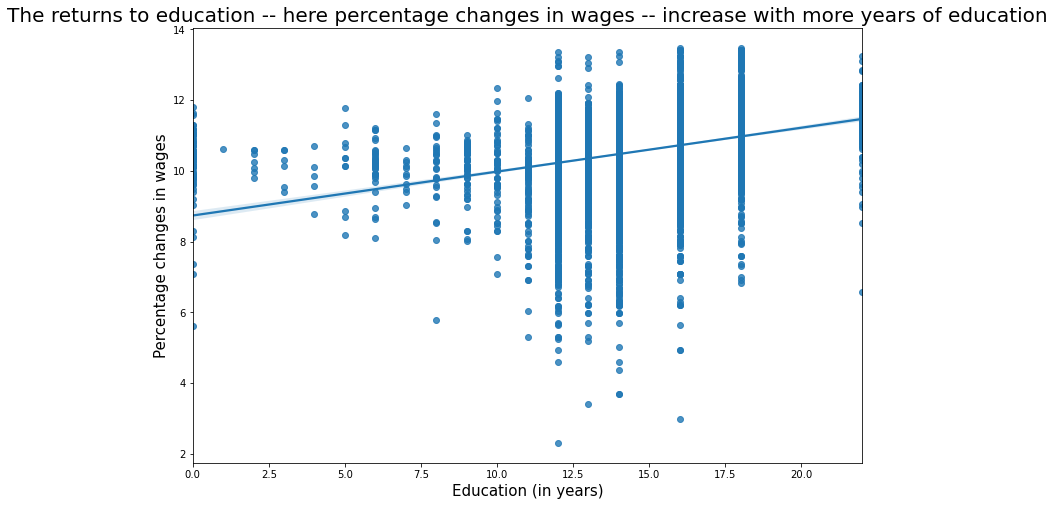

In [46]:
plt.figure(figsize=(12,8))
sns.regplot(x="educdc", y='lnincwage', data=df)
plt.xlabel("Education (in years)", fontsize=15)
plt.ylabel("Percentage changes in wages", fontsize=15)
plt.title("The returns to education -- here percentage changes in wages -- increase with more years of education", fontsize=20)
plt.show()

In [47]:
# 3 
df.columns

Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STRATA',
       'GQ', 'PERNUM', 'PERWT', 'NCHILD', 'NCHLT5', 'SEX', 'AGE', 'MARST',
       'RACE', 'RACED', 'HISPAN', 'HISPAND', 'EDUC', 'EDUCD', 'EMPSTAT',
       'EMPSTATD', 'INCWAGE', 'VETSTAT', 'VETSTATD', 'educdc', 'hsdip',
       'coldip', 'white', 'black', 'hispanic', 'married', 'female', 'vet',
       'educdc X hsdip', 'educdc X coldip', 'AGEsq', 'lnincwage'],
      dtype='object')

In [48]:
# import statsmodels.formula.api as smf
result = smf.ols('lnincwage ~ educdc + female + AGE + AGEsq + white + black + hispanic + married + NCHILD + vet', data = df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              lnincwage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     380.3
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:13:13   Log-Likelihood:                -11652.
No. Observations:                8642   AIC:                         2.333e+04
Df Residuals:                    8631   BIC:                         2.340e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5508      0.121     45.934      0.0

In [49]:
# a 

In [50]:
# The fraction of the variation explained is given by R-squared value (the R-squared adjusted value for the additional predictors is very similar so I'll go with the more prevalent one used in academia, the regular R-squared). The value is 0.306 hence the model explains 30.6 per cent of the variation in our depenedent variable, log wages.  

In [51]:
# b 

In [52]:
# The null is very pessimistic ("none of our Xs combined have predictive value for wages"): the one we look for is the F-test! The F-statistic is at 380.3, that's a very large value. Consequently, the p-value is very low as we can see: 0.00. That said, we can definitely reject the null at a 10% significance level, we could even reject it at a more conservative level too, e.g. 5% or 1%. Hence, we can conclude that all of our coefficients are JOINTLY significant, hence, this model with the Xs chosen does a good job at predicting the wages.
# This is not be confused with the respective p-values from a bivariate standpoint that is shown in each row pertaining to the respective independent variables, the Xs. As we can see there, from the regression table, all of our independent values are statistically significant too EXCEPT for: white, hispanic, NCHILD, and vet. Yet, this is different from the F-statistic which as explained in the line above takes the significance of the model as a whole, with all included variables being tested JOINTLY.    

In [53]:
# c 

In [54]:
# Because we are using log wages, an additional year of education yields an 11 per cent increase in log wages, ceteris paribus. As we can see from the corresponding p-value, this is highly significant, even at a conservative threshold. 
# Talking about the practical significane, hence the magnitude of the coefficient, the practical signifance will depend upon the actual income of a person in real wages. For example, if a person earns $10, an addtional dollar earned (rounded) means more to him/ her than a wage increase from 100,000 to 110,000 dollars for someone who already is rich and can afford practically anything. From an economic point of view, however, an increase of 10%, in the example of the rich person I gave that is $10,000, is a lot of money and hence meaningful.
# That said, given the magnitude, 11%, I would definitely argue that the returns of an additional year of education in terms of wage increases are not just statistically but also practically/ economically meaningful: they do have quite a large significance, both in statistical and practical terms.

In [55]:
# d 

In [56]:
# Please see hand-written snap in WORD document. The answer is that my model predicts at an age of approx. 47 and a half an individual achieves the highest wage. 

In [57]:
# e 

In [58]:
# Given that our female variable is a dummy and the highly statistically coefficient at -0.4288, ceteris paribus, we can conclude that being a women affects log wages negatively whereas being a man (code female = 0), doesn't, ceteris paribus. Hence being a man doesn't affect the wages negatively while being a women, it does at a rate of approx. -43% (which also is the percentage difference between the two holding all other Xs constant).

In [59]:
# f 

In [60]:
# The coefficient for white is at -0.0238, ceteris paribus, suggesting that being white affects wages negatively at approx. -2.4 per cent. However, it's not statistically significant, we cannot reject the null for white. Unlike for black, which is highly significant. The coefficient is at -0.2278, holding all else equal, and thus implies being black negatively affects the log wages at a rate of approx. -22.8 per cent (22.8 per cent less pay on average when being black!). Similarly to whites, the coefficient suggests that being hispanic negatively impacts wages at -0.0269 meaning on average 2.7 per cent less wages, however, the hispanic predictor is not statistically significant either holding all else equal. 

In [61]:
# g

In [62]:
# I do not assume that being hispanic is a race. Hence, I will test for black and white only. Note: F-Test!
# That said, the null is that beta5 = beta6 = 0 meaning race has no effect on wages hence coding white or black as 1 (it's a dummy) will result in a zero percent change in log wages under the null. As common in the social sciences, I'll use an alpha of 5 percent (=0.05).
# The alternative (I take a two-sided approach) states that the effect of race on wages is non zero hence affecting the log wages either positive or negative which makes sense here because we test for both white and black with effects going in diffeent directions (assuming wages go up for whites and down for blacks due to racial injustice). 
# That said, I'd assume the effects would cancel each other out (that's for the model as a whole! -> taken jointly: F-statistic!) and our results would be inconclusive (for the model as a whole) hence not statistically significant. But let's see ...

result = smf.ols('lnincwage ~ white + black', data = df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              lnincwage   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     44.51
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           5.88e-20
Time:                        12:13:14   Log-Likelihood:                -13186.
No. Observations:                8642   AIC:                         2.638e+04
Df Residuals:                    8639   BIC:                         2.640e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4912      0.033    317.304      0.0

In [63]:
# First note how low the R-squared value is: this model does only explain 1 per cent of the variation of logwages! That means there's so much more to explaining the changes in wages than just race. In any case:
# My results are consistent with my previous findings and also with my assumptions. 
# Looking at my findings from a joint perspective, meaning race as stated in my null, I find that the F-statistic is rather low, 44.51, and the corresponding p-level at 5.8 per cent would NOT pass the common 5 percent threshold. Hence, I would fail to reject the null at a 5 per cent significance level and conclude that the coefficients are not JOINTLY significant.

# But are they individually? Note: this bit goes beyond my null but since it further strengthens my findings, I shall include these following observations too. 
# Breaking my findings down further and looking at each X individually now, I can see that: 
# Being white increases logwages by approx. 5.6 per cent while being black leads to a wage decrease of approx. 33.7%. However, given that only one of the two is statsitcially significant (black is at a low threshold/ a significance level of 1%, being white isn't significant not even at a 10% significance level),
# this further supports my previous findings where I tested for both at the same time: race alone does not affect wages and as the R-squared suggests, there's more to it than just race. We would need to include more regressors because as it stands now, our model suffers from Omitted Variable Bias. 

In [64]:
# 4 

In [65]:
#import numpy as np
#from numpy.polynomial.polynomial import polyfit
#import matplotlib.pyplot as plt

In [66]:
x_1 = df[df["hsdip"]==0]
x_2 = df[df["hsdip"]==1]
x_3 = df[df["coldip"]==1]
x_1 = x_1[["lnincwage", "educdc", "hsdip"]]
x_2 = x_2[["lnincwage", "educdc", "hsdip"]]
x_3 = x_3[["lnincwage", "educdc", "coldip"]]

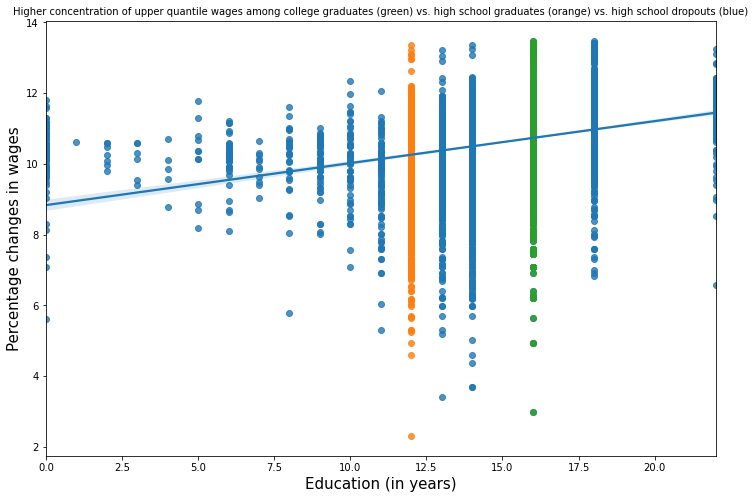

In [89]:
# The orange line is at 12 years so hsdip = 1 and the green one is at 16 years so coldip = 1
# It makes sense for these two fitted lines to be vertical because at 12 or 16 years there is no percentage change because we don't move along the x-axis (no 1-unit increase or decrease that could result in a wage change).

plt.figure(figsize=(12,8))
sns.regplot(x="educdc", y='lnincwage', data=x_1)
sns.regplot(x="educdc", y='lnincwage', data=x_2)
sns.regplot(x="educdc", y='lnincwage', data=x_3)
plt.xlabel("Education (in years)", fontsize=15)
plt.ylabel("Percentage changes in wages", fontsize=15)
plt.title("The returns to education increase with more years of education:", fontsize=20)
plt.title("Higher concentration of upper quantile wages among college graduates (green) vs. high school graduates (orange) vs. high school dropouts (blue)", fontsize=10)
plt.show()

# Or:
# x_1
#plt.scatter(x_1["educdc"], x_1["lnincwage"])
#m, b = np.polyfit(x_1["educdc"], x_1["lnincwage"], 1)
#plt.plot(x_1["educdc"], m*x_1["educdc"] + b)

# x_2
#plt.plot(x_2["educdc"], x_2["lnincwage"], 'o')
#m, b = np.polyfit(x_2["educdc"], x_2["lnincwage"], 1)
#plt.plot(x_2["educdc"], m*x_2["educdc"] + b)

# x_3
#plt.plot(x_3["educdc"], x_3["lnincwage"], 'o')
#m, b = np.polyfit(x_3["educdc"], x_3["lnincwage"], 1)
#plt.plot(x_3["educdc"], m*x_3["educdc"] + b)

In [68]:
# 5 

In [69]:
# import statsmodels.formula.api as smf
result = smf.ols('lnincwage ~ coldip + hsdip + educdc + female + AGE + AGEsq + white + black + hispanic + married + NCHILD + vet', data = df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              lnincwage   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     321.9
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:13:16   Log-Likelihood:                -11632.
No. Observations:                8642   AIC:                         2.329e+04
Df Residuals:                    8629   BIC:                         2.338e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7249      0.126     45.471      0.0

In [70]:
# This model explains slightly more of the variation in y now that I included the two dummies up front: R^2 rises slightly to almost 31% and the findings make sense with regards to what I uncovered previously and assumed: 
# Both dummies are statistically significant at a 5-% significance level. Having a college degree (code as coldip = 1) will increase wages by 14 per cent (wow!), ceteris parivbus. Having no high school diploma decrreass wages by approx. 6 per cent, which is also the difference in expected wages when having graduated from high school. 
# That said, having a college degree is not only a stronger predictor for wages, much more so than having a high school diploma judging by the higher p-value, the magnitude of the coefficient also suggests that its impact on wages is also much more meaningful: an increase by 14 per cent! 

In [71]:
# 6 

In [72]:
# a

In [73]:
individual_1 = {'AGE': [22], "female": [1], "white": [0], "black": [0], "hispanic": [0], "married": [0], "NCHILD": [0], "vet": [0], "hsdip": [1], "coldip": [0], "educdc": [12], "AGEsq": [484]}
predict_1 = pd.DataFrame(data=individual_1)
print(predict_1)
prediction_1 = result.get_prediction(predict_1)
prediction_1.summary_frame(alpha=0.05)

   AGE  female  white  black  hispanic  married  NCHILD  vet  hsdip  coldip  \
0   22       1      0      0         0        0       0    0      1       0   

   educdc  AGEsq  
0      12    484  


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,9.124729,0.041734,9.04292,9.206538,7.299292,10.950166


In [74]:
# What is the predicted wage in absolute terms associated with a log wage of 9.124729? 
# from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(df["lnincwage"].to_frame(), df["INCWAGE"])
model.predict(pd.Series([9.124729]).to_frame())

array([-555.41124646])

In [75]:
individual_2 = {'AGE': [22], "female": [1], "white": [0], "black": [0], "hispanic": [0], "married": [0], "NCHILD": [0], "vet": [0], "hsdip": [1], "coldip": [1], "educdc": [16], "AGEsq": [484]}
predict_2 = pd.DataFrame(data=individual_2)
print(predict_2)
prediction_2 = result.get_prediction(predict_2)
prediction_2.summary_frame(alpha=0.05)

   AGE  female  white  black  hispanic  married  NCHILD  vet  hsdip  coldip  \
0   22       1      0      0         0        0       0    0      1       1   

   educdc  AGEsq  
0      16    484  


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,9.659923,0.049914,9.56208,9.757767,7.833698,11.486149


In [76]:
# What is the predicted wage in absolute terms associated with a log wage of 9.659923? 
# from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(df["lnincwage"].to_frame(), df["INCWAGE"])
model.predict(pd.Series([9.659923]).to_frame())

array([22686.21663434])

In [77]:
# Compare the findings with our summary stats from #1:
lnincwage_sum

count    8642.000000
mean       10.503246
std         1.118516
min         2.302585
25%        10.043249
50%        10.633446
75%        11.184421
max        13.482831
Name: lnincwage, dtype: float64

In [78]:
INCWAGE_sum

count      8642.000000
mean      59308.804675
std       69146.471723
min          10.000000
25%       23000.000000
50%       41500.000000
75%       72000.000000
max      717000.000000
Name: INCWAGE, dtype: float64

In [79]:
# b

In [80]:
# To begin with, see answer to # 5 where I wrote: 
# "Both dummies are statistically significant at a 5-% significance level. Having a college degree (code as coldip = 1) will increase wages by 14 per cent (wow!), ceteris parivbus. Having no high school diploma decreases wages by approx. 6 per cent, which is also the difference in expected wages when having graduated from high school. 
# That said, having a college degree is not only a stronger predictor for wages, much more so than having a high school diploma judging by the higher p-value, the magnitude of the coefficient also suggests that its impact on wages is also much more meaningful: an increase by 14 per cent!"

# In addition to that, based on my findings in 6a, I can say that: 
# Yes, individuals with college degrees do have higher predicted wages than those without.
# In our specific example (for general interpretation, see above), the first individual with a high school diploma but no college degree earns on average $555.4 less than what is expected (note: I converted to absolute absolute terms for easier interpretation for the President). 
# That changes for the very same individual with equal characterics except for that she now has a college degree. She earns now on average $22686 more than expected. 
# Taken together, the difference between the two is at approx. $23423 (22868 + 555) in absolute terms. 
# In relative terms, the wage increases by approx. 54 per cent for the specific individual we looked at, that is: 9.66-9.12 (note both are random variables in themselves). 

# So, yes, Mr. President, both with regards to both the general interpretation in #5 as well as #6a, both in absolute and relative/ comparative terms, individuals holding a college degree do earn more on average than individuals without, holding all other factors constant.


In [81]:
# c

In [82]:
# Given what we just learned, and in addition to my elaborations in 6b and 5, I would advise the President to implement the policy because the returns to education are notable as elaborated above in 6b.
# General: +14 per cent -> that is the increase holding a college degree vs. holding none, holding all others factors constant
# Individual: +54 per cent -> that is the increase specific to a young female 
# That in addition to a progressive tax policy in which people who earn more, pay more, is likely to offset the cost of the subsidies and on top of that disproportionally empowers females, which is desirable and needed.
# Why needed? Because that individual still, despite the college degree, earns less than average: she's at $22686 and the median is $41500 (I don't consider the mean because income data is highly skewed). Yet, it's a step in the right direction, so yes, Mr. President, good idea, education is the grand equalizer, however depending on the purpose of the policy, say promoting gender equality, it can be further enhanced by disproportionaly promoting young females (or people of color), e.g. offering them tax deductions in the future if they go to college. However, if the actual purpose is to secure a budget increase in the future, then this would be counterintuitive. 
# That said, good idea, but I'll need to make sure to get more information from the President in order to come to a definite conclusion.  

In [83]:
# 7 

In [84]:
# There are a few ways to do things differently, e.g. 
# - Include other or more regressors, e.g. first generation immigrants, state/ geography, handicaps, etc. 
# - Use a non-linear model (that we are yet to learn about in class for quantitative outcomes)
# - Instead having income as the dependent variable, take e.g. likelihood of debt as a measure for financial security later in life and run a Linear Probability Model (LPM) OR a Quadratic Discriminat Analysis which allows for many Xs and is non-linear